# Phase 3 Final Project

* Kevin Gross
* Part Time Flatiron Student

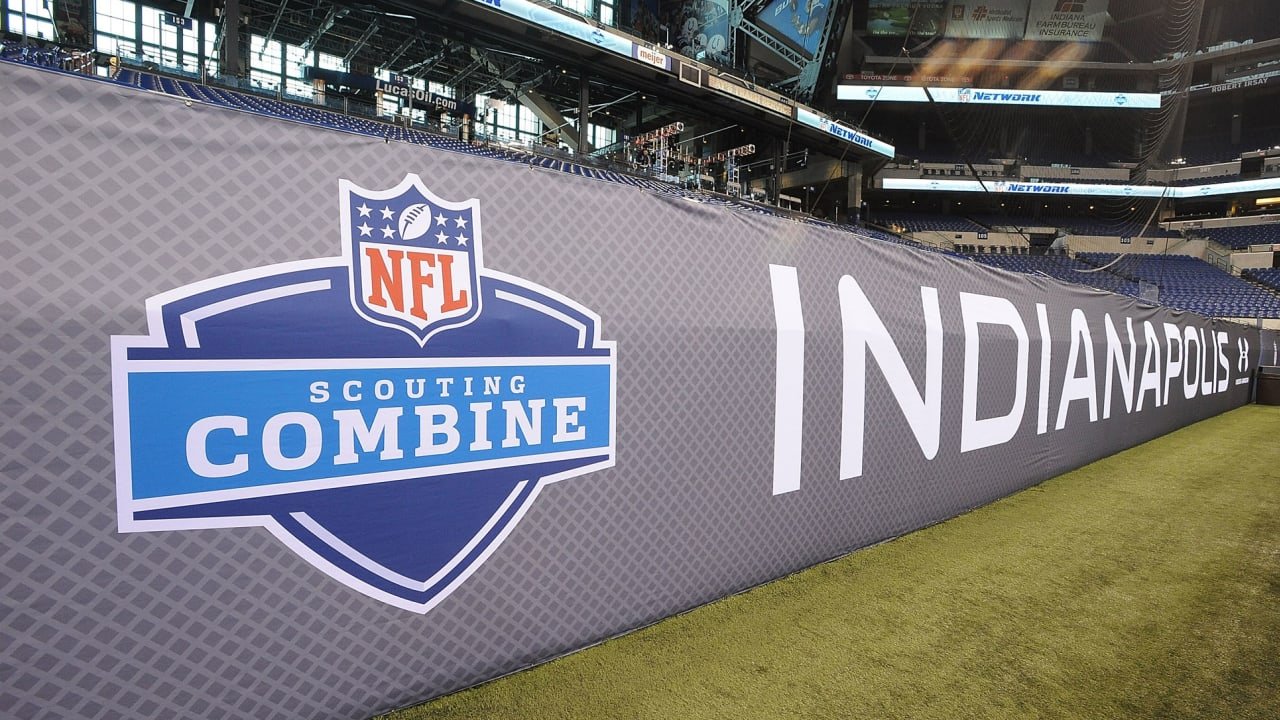

## NFL Combine Data Analysis

### General Overview

### Buisness Problem

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, log_loss, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('Data/NFL.csv')

In [4]:
display(df.head())
print(df.shape)

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes


(3477, 18)


Right off the bat, we can see that we have almost 3,500 rows, each with 17 feature columns and 1 target column:

* `Year`: Year of attendance at the NFL combine
* `Player`: Player name
* `Age`: Players age (years)
* `School`: College attended
* `Height`: Height (meters)
* `Weight`: Weight (kilograms)
* `Sprint_40yd`: 40 yard sprint time (seconds)
* `Vertical_Jump`: Vertical jump result (centimeters) 
* `Bench_Press_Reps`: Maximum bench press repetitions achieved while lifting 102.1 kg (225 lb) weight
* `Broad_Jump`: Broad jump result (centimeters)
* `Agility_3cone`: Three-cone agility test time (seconds)
* `Shuttle`: Lateral shuttle time (seconds)
* `Drafted..tm.rnd.yr.`: Team the athlete was drafted by, draft round, draft pick, and year
* `BMI`: Body mass index (kg/m2)
* `Player_Type`: Offensive or defensive player or special teams
* `Position_Type`: Broad classification of the athlete's playing position
* `Position`: Playing position
* `Drafted`: Was the player drafted during the NFL draft?

This is a fairly balanced dataset, with 65% of the combine attendees drafted and 35% not drafted.

In [4]:
print("Raw Counts")
print(df['Drafted'].value_counts())
print()
print("Percentages")
print(df['Drafted'].value_counts(normalize=True))

Raw Counts
Yes    2254
No     1223
Name: Drafted, dtype: int64

Percentages
Yes    0.64826
No     0.35174
Name: Drafted, dtype: float64


Thus, a baseline model that always chose the majority class (in this case that a player was drafted) would have an accuracy of 64.8%. 

## Modeling

We are going to try multiple iterations of models in order to maximize our accuracy.

### Logistic Regression - [Documentation Here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

### K-Nearest Neighbors - [Documentation Here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

This algorithm — unlike linear models or tree-based models — does not emphasize learning the relationship between the features and the target. Instead, for a given test record, it finds the most similar records in the training set and returns an average of their target values.

### Decision Trees - [Documentation Here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Similar to linear models (and unlike kNN), this algorithm emphasizes learning the relationship between the features and the target. However, unlike a linear model that tries to find linear relationships between each of the features and the target, decision trees look for ways to split the data based on features to decrease the entropy of the target in each split.

### Random Forest - [Documentation Here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

## Data Cleaning and Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 3477 non-null   int64  
 1   Player               3477 non-null   object 
 2   Age                  2927 non-null   float64
 3   School               3477 non-null   object 
 4   Height               3477 non-null   float64
 5   Weight               3477 non-null   float64
 6   Sprint_40yd          3303 non-null   float64
 7   Vertical_Jump        2780 non-null   float64
 8   Bench_Press_Reps     2572 non-null   float64
 9   Broad_Jump           2749 non-null   float64
 10  Agility_3cone        2260 non-null   float64
 11  Shuttle              2337 non-null   float64
 12  Drafted..tm.rnd.yr.  2254 non-null   object 
 13  BMI                  3477 non-null   float64
 14  Player_Type          3477 non-null   object 
 15  Position_Type        3477 non-null   o

In [6]:
# Check for missing values
df.isna().sum()

Year                      0
Player                    0
Age                     550
School                    0
Height                    0
Weight                    0
Sprint_40yd             174
Vertical_Jump           697
Bench_Press_Reps        905
Broad_Jump              728
Agility_3cone          1217
Shuttle                1140
Drafted..tm.rnd.yr.    1223
BMI                       0
Player_Type               0
Position_Type             0
Position                  0
Drafted                   0
dtype: int64

We can see here that we are missing a good amount of records for a few important columns. However, off the bat we can drop the `Drafted..tm.rnd.yr.` column because it is irrelevant for our model. We can also drop `Position_Type` because this is the same information as `Position` except contains less detail. We can also drop `Player` as we do not care about the player's name.

In [7]:
df.drop(columns=['Drafted..tm.rnd.yr.', 'Position_Type', 'Player'], axis=1, inplace=True)

In [8]:
# Confirm that the columns were dropped
df.isna().sum()

Year                   0
Age                  550
School                 0
Height                 0
Weight                 0
Sprint_40yd          174
Vertical_Jump        697
Bench_Press_Reps     905
Broad_Jump           728
Agility_3cone       1217
Shuttle             1140
BMI                    0
Player_Type            0
Position               0
Drafted                0
dtype: int64

Next, let's try to fill in the 550 missing values in the `Age` column.

In [9]:
df['Age'].describe()

count    2927.000000
mean       21.983259
std         0.969490
min        18.000000
25%        21.000000
50%        22.000000
75%        23.000000
max        28.000000
Name: Age, dtype: float64

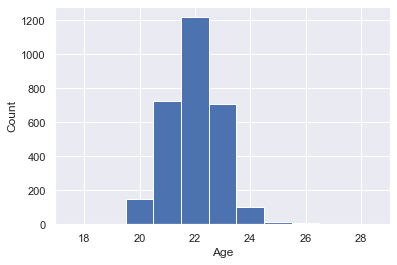

In [10]:
sns.set(style="darkgrid")

sns.histplot(data=df, x="Age", discrete=True, alpha=1.0);

Since age appears to have a Gaussian distribution, let's fill in the blank age ranges using a normal distribution.

In [11]:
# Set a random seed for reproducibility
np.random.seed(8)

# Pull out the index of every row that has NA for 'Age'
index = df[df['Age'].isna()].index

# Use a normal distribution to get random ages based around the mean and standard deviation
value = np.random.normal(loc=df['Age'].mean(), scale=df['Age'].std(), size=df['Age'].isna().sum())

# Round to the nearest whole number
value = value.round(0)

# Fill in the missing indicies using our randomly generated values
df['Age'].fillna(pd.Series(value, index=index), inplace=True)

In [12]:
df['Age'].describe()

count    3477.000000
mean       21.985045
std         0.980128
min        18.000000
25%        21.000000
50%        22.000000
75%        23.000000
max        28.000000
Name: Age, dtype: float64

In [13]:
# Confirm that it worked
df.isna().sum()

Year                   0
Age                    0
School                 0
Height                 0
Weight                 0
Sprint_40yd          174
Vertical_Jump        697
Bench_Press_Reps     905
Broad_Jump           728
Agility_3cone       1217
Shuttle             1140
BMI                    0
Player_Type            0
Position               0
Drafted                0
dtype: int64

We still have missing values for 6 other columns: `Sprint_40yd`, `Vertical_Jump`, `Bench_Press_Reps`, `Broad_Jump`, `Agility_3cone`, and `Shuttle`. Let's look at the distribution of these below.

C:\Users\kevgr\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kevgr\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


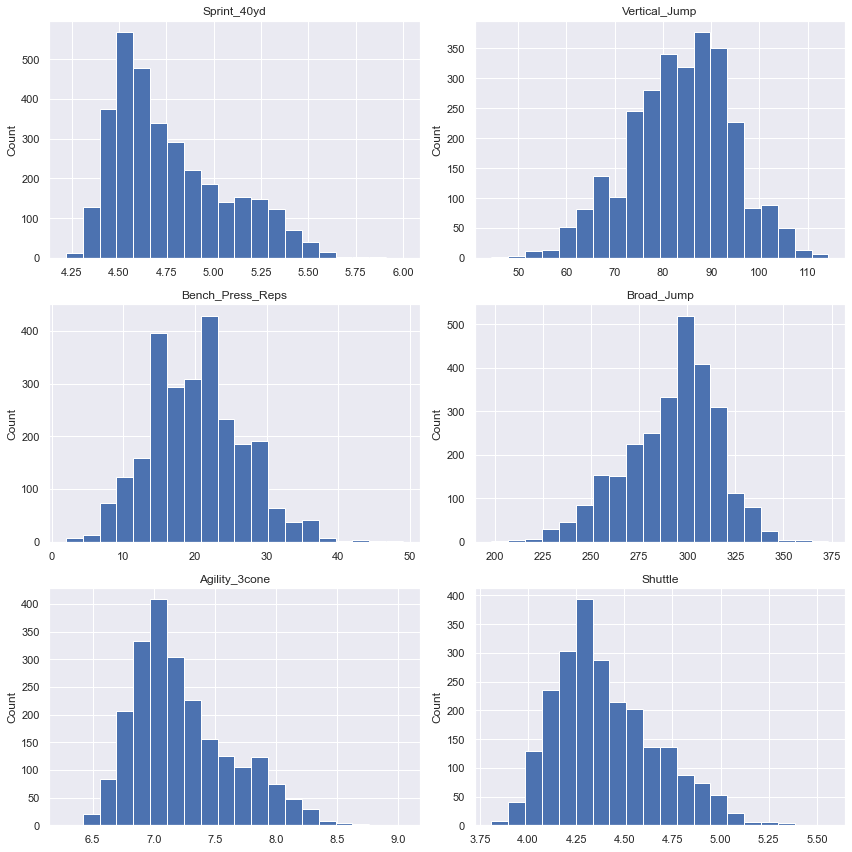

In [14]:
# Create figure and set figure size and attributes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
fig.set_tight_layout(True)

# Iterate through variables with a for loop and make one histogram plot for each one
for index, col in enumerate(df.columns[5:11]):
    ax = axes[index//2][index%2]
    ax.hist(df[col], bins=20)
    ax.set_ylabel('Count')
    
    #Set column name as title
    ax.set_title(col)

As we can see above, none of these graphs appear to have a normal distribution. This can be attributed to the fact that each position will have very different sized men, which means they were perform each task at varying levels. For example, a wide receiver is going to be much faster at the `Sprint_40yrd` than an offensive lineman.

In [15]:
wide_receivers = df[df['Position'] == 'WR']
offensive_tackle = df[df['Position'] == 'OT']

print('Wide Receiver 40 Yard Dash Times:')
print(wide_receivers['Sprint_40yd'].describe())
print('\n')
print('Offensive Tackle 40 Yard Dash Times:')
print(offensive_tackle['Sprint_40yd'].describe())

Wide Receiver 40 Yard Dash Times:
count    480.000000
mean       4.503646
std        0.097032
min        4.220000
25%        4.430000
50%        4.510000
75%        4.562500
max        4.850000
Name: Sprint_40yd, dtype: float64


Offensive Tackle 40 Yard Dash Times:
count    258.000000
mean       5.226628
std        0.177057
min        4.710000
25%        5.125000
50%        5.220000
75%        5.337500
max        5.850000
Name: Sprint_40yd, dtype: float64


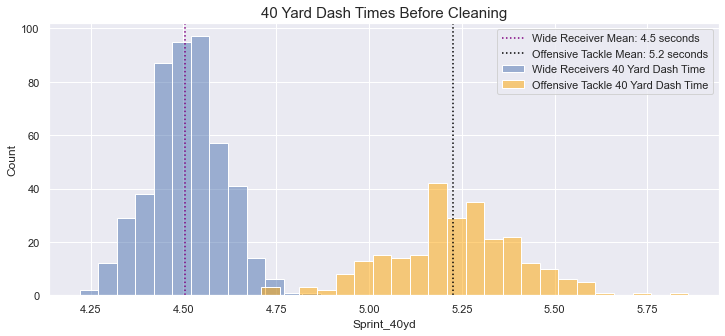

In [16]:
fig, axes = plt.subplots(figsize=(12,5))

sns.histplot(data=wide_receivers['Sprint_40yd'], alpha=0.5, binwidth=.05, 
             label='Wide Receivers 40 Yard Dash Time')
sns.histplot(data=offensive_tackle['Sprint_40yd'], alpha=0.5, color='orange', 
             binwidth=.05, label='Offensive Tackle 40 Yard Dash Time')

plt.axvline(x=np.mean(wide_receivers['Sprint_40yd']), color='purple',  linestyle=':', 
            label='Wide Receiver Mean: 4.5 seconds')
plt.axvline(x=np.mean(offensive_tackle['Sprint_40yd']), color='black', linestyle=':',
           label= 'Offensive Tackle Mean: 5.2 seconds')
plt.title('40 Yard Dash Times Before Cleaning', size=15)
plt.legend();

### Adding Missing Data

Looking at this data above, it confirms that we need to be very careful about how we input the missing data. Luckily, Scikit-Learn has a tool called Iterative Imputer that we can implment for this type of situation. From SciKit Learn's docstring:

> "Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion."

Let's pull out the columns that are missing data and fit and transform those columns using the Iterative Imputer.

In [17]:
missing = df[['Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump',
       'Agility_3cone', 'Shuttle']]
missing

,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle
0,4.38,85.09,25.0,325.12,NaN,NaN
1,4.84,83.82,27.0,292.10,7.38,4.45
2,5.50,NaN,21.0,NaN,NaN,NaN
3,4.49,93.98,15.0,304.80,7.09,4.23
4,4.76,92.71,26.0,304.80,7.10,4.40
...,...,...,...,...,...,...
3472,4.48,95.25,11.0,NaN,NaN,NaN
3473,4.51,100.33,13.0,325.12,NaN,NaN
3474,4.47,100.33,15.0,342.90,6.82,4.14
3475,4.51,82.55,18.0,292.10,7.21,4.19


In [18]:
iter_imp = IterativeImputer(random_state=8)

iter_imp.fit(missing)

missing = iter_imp.transform(missing)

C:\Users\kevgr\anaconda3\envs\learn-env\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [19]:
missing = pd.DataFrame(missing, columns=['Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump',
       'Agility_3cone', 'Shuttle']).round(2)

In [20]:
df.drop(columns=['Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump',
       'Agility_3cone', 'Shuttle'], axis=1, inplace=True)

In [21]:
cleaned_df = pd.concat([df, missing], axis=1)
cleaned_df

,Year,Age,School,Height,Weight,BMI,Player_Type,Position,Drafted,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle
0,2009,20.0,Ohio St.,1.8542,106.594207,31.004194,offense,RB,Yes,4.38,85.09,25.00,325.12,6.88,4.17
1,2009,22.0,Illinois,1.8796,118.387609,33.510073,defense,DE,Yes,4.84,83.82,27.00,292.10,7.38,4.45
2,2009,24.0,LSU,2.0066,165.107623,41.005821,offense,OG,Yes,5.50,62.50,21.00,243.23,7.97,4.88
3,2009,23.0,Alabama,1.8034,92.079251,28.312463,defense,FS,Yes,4.49,93.98,15.00,304.80,7.09,4.23
4,2009,22.0,Connecticut,1.8796,110.676538,31.327425,defense,OLB,Yes,4.76,92.71,26.00,304.80,7.10,4.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,2019,21.0,Central Michigan,1.8034,84.821773,26.080939,defense,CB,No,4.48,95.25,11.00,315.55,6.84,4.15
3473,2019,24.0,South Dakota St.,1.8288,91.172066,27.260221,defense,CB,No,4.51,100.33,13.00,325.12,6.84,4.15
3474,2019,24.0,Washburn,1.8034,88.904105,27.336171,defense,CB,No,4.47,100.33,15.00,342.90,6.82,4.14
3475,2019,22.0,Oregon,1.7526,90.264882,29.386861,defense,S,No,4.51,82.55,18.00,292.10,7.21,4.19


In [22]:
# Confirm that it worked
cleaned_df.isna().sum()

Year                0
Age                 0
School              0
Height              0
Weight              0
BMI                 0
Player_Type         0
Position            0
Drafted             0
Sprint_40yd         0
Vertical_Jump       0
Bench_Press_Reps    0
Broad_Jump          0
Agility_3cone       0
Shuttle             0
dtype: int64

In [23]:
clean_wide_receivers = cleaned_df[cleaned_df['Position'] == 'WR']
clean_offensive_tackle = cleaned_df[cleaned_df['Position'] == 'OT']

print('Wide Receiver 40 Yard Dash Times After Cleaning:')
print(clean_wide_receivers['Sprint_40yd'].describe())
print('\n')
print('Offensive Tackle 40 Yard Dash Times After Cleaning:')
print(clean_offensive_tackle['Sprint_40yd'].describe())

Wide Receiver 40 Yard Dash Times After Cleaning:
count    506.000000
mean       4.512115
std        0.105991
min        4.220000
25%        4.440000
50%        4.510000
75%        4.577500
max        4.850000
Name: Sprint_40yd, dtype: float64


Offensive Tackle 40 Yard Dash Times After Cleaning:
count    278.000000
mean       5.207014
std        0.189916
min        4.710000
25%        5.090000
50%        5.210000
75%        5.320000
max        5.850000
Name: Sprint_40yd, dtype: float64


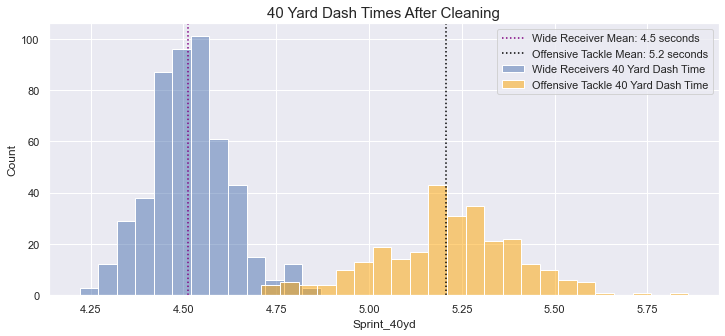

In [24]:
fig, axes = plt.subplots(figsize=(12,5))

sns.histplot(data=clean_wide_receivers['Sprint_40yd'], alpha=0.5, binwidth=.05, 
             label='Wide Receivers 40 Yard Dash Time')
sns.histplot(data=clean_offensive_tackle['Sprint_40yd'], alpha=0.5, color='orange', 
             binwidth=.05, label='Offensive Tackle 40 Yard Dash Time')

plt.axvline(x=np.mean(clean_wide_receivers['Sprint_40yd']), color='purple',  linestyle=':', 
            label='Wide Receiver Mean: 4.5 seconds')
plt.axvline(x=np.mean(clean_offensive_tackle['Sprint_40yd']), color='black', linestyle=':',
           label= 'Offensive Tackle Mean: 5.2 seconds')
plt.title('40 Yard Dash Times After Cleaning', size=15)
plt.legend();

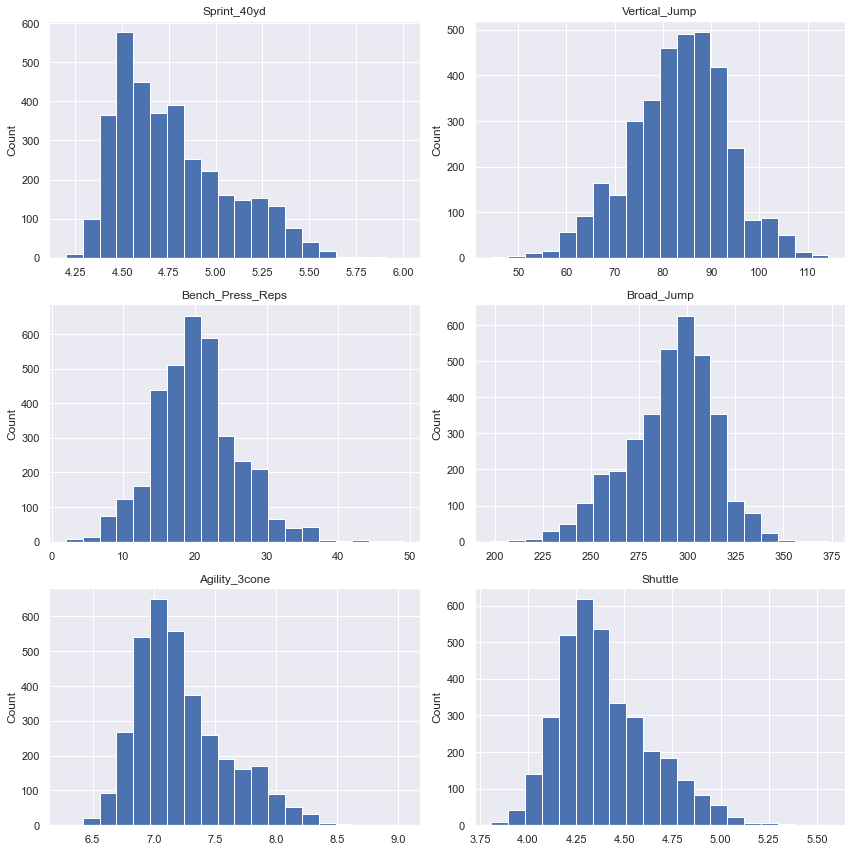

In [25]:
# Create figure and set figure size and attributes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
fig.set_tight_layout(True)

# Iterate through variables with a for loop and make one histogram plot for each one
for index, col in enumerate(cleaned_df.columns[9:]):
    ax = axes[index//2][index%2]
    ax.hist(cleaned_df[col], bins=20)
    ax.set_ylabel('Count')
    
    #Set column name as title
    ax.set_title(col)

In [26]:
cleaned_df.head()

,Year,Age,School,Height,Weight,BMI,Player_Type,Position,Drafted,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle
0,2009,20.0,Ohio St.,1.8542,106.594207,31.004194,offense,RB,Yes,4.38,85.09,25.0,325.12,6.88,4.17
1,2009,22.0,Illinois,1.8796,118.387609,33.510073,defense,DE,Yes,4.84,83.82,27.0,292.10,7.38,4.45
2,2009,24.0,LSU,2.0066,165.107623,41.005821,offense,OG,Yes,5.50,62.50,21.0,243.23,7.97,4.88
3,2009,23.0,Alabama,1.8034,92.079251,28.312463,defense,FS,Yes,4.49,93.98,15.0,304.80,7.09,4.23
4,2009,22.0,Connecticut,1.8796,110.676538,31.327425,defense,OLB,Yes,4.76,92.71,26.0,304.80,7.10,4.40


In [27]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              3477 non-null   int64  
 1   Age               3477 non-null   float64
 2   School            3477 non-null   object 
 3   Height            3477 non-null   float64
 4   Weight            3477 non-null   float64
 5   BMI               3477 non-null   float64
 6   Player_Type       3477 non-null   object 
 7   Position          3477 non-null   object 
 8   Drafted           3477 non-null   object 
 9   Sprint_40yd       3477 non-null   float64
 10  Vertical_Jump     3477 non-null   float64
 11  Bench_Press_Reps  3477 non-null   float64
 12  Broad_Jump        3477 non-null   float64
 13  Agility_3cone     3477 non-null   float64
 14  Shuttle           3477 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 407.6+ KB


We are almost there! Next we need to change the `School`, `Position`, and `Drafted` columns into one-hot numeric arrays.

In [28]:
cleaned_df = pd.get_dummies(cleaned_df, drop_first=True)

cleaned_df

,Year,Age,Height,Weight,BMI,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,...,Position_OLB,Position_OT,Position_P,Position_QB,Position_RB,Position_S,Position_SS,Position_TE,Position_WR,Drafted_Yes
0,2009,20.0,1.8542,106.594207,31.004194,4.38,85.09,25.00,325.12,6.88,...,0,0,0,0,1,0,0,0,0,1
1,2009,22.0,1.8796,118.387609,33.510073,4.84,83.82,27.00,292.10,7.38,...,0,0,0,0,0,0,0,0,0,1
2,2009,24.0,2.0066,165.107623,41.005821,5.50,62.50,21.00,243.23,7.97,...,0,0,0,0,0,0,0,0,0,1
3,2009,23.0,1.8034,92.079251,28.312463,4.49,93.98,15.00,304.80,7.09,...,0,0,0,0,0,0,0,0,0,1
4,2009,22.0,1.8796,110.676538,31.327425,4.76,92.71,26.00,304.80,7.10,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,2019,21.0,1.8034,84.821773,26.080939,4.48,95.25,11.00,315.55,6.84,...,0,0,0,0,0,0,0,0,0,0
3473,2019,24.0,1.8288,91.172066,27.260221,4.51,100.33,13.00,325.12,6.84,...,0,0,0,0,0,0,0,0,0,0
3474,2019,24.0,1.8034,88.904105,27.336171,4.47,100.33,15.00,342.90,6.82,...,0,0,0,0,0,0,0,0,0,0
3475,2019,22.0,1.7526,90.264882,29.386861,4.51,82.55,18.00,292.10,7.21,...,0,0,0,0,0,1,0,0,0,0


# Modeling

Now that we have a cleaned dataframe (`cleaned_df`), we can go ahead and start creating our models that can predict whether or not a player was drafted. The steps we are going to follow are below:

### 1. Prepare the Data for Modeling
For a complete end-to-end ML process, we need to create a holdout set that we will use at the end to evaluate our model's performance. We can do this by using `train-test-split`. Additionally we will want to us `StandardScaler` on our `X_train`.
### 2. Build and Evaluate a Baseline Model
Without performing any hyperparameter tuning, we are going to build and evaluate a vanilla logistic regression model using log loss and `cross_val_score`.
### 3. Build and Evaluate Additional Logistic Regression Models
Build multiple logistic regression models with different hyperparameters in order to minimize log loss.
### 4. Build a Baseline kNN Model
Without performing any hyperparameter tuning, we are going to build and evaluate a vanilla kNN regression model using log loss and `cross_val_score`.
### 5. Build Iterative Models to Find the Best kNN Model
Build multiple kNN regression models with different hyperparameters in order to minimize log loss.
### 6. Build a Baseline Decision Tree Model
Without performing any hyperparameter tuning, we are going to build and evaluate a vanilla Decision Tree regression model using log loss and `cross_val_score`.
### 7. Build Iterative Models to Find the Best Decision Tree Model
Build multiple Decision Tree regression models with different hyperparameters in order to minimize log loss.
### 8. Build a Baseline Random Forest Model
Without performing any hyperparameter tuning, we are going to build and evaluate a vanilla Random Forest regression model using log loss and `cross_val_score`.l
### 9. Build Iterative Models to Find the Best Random Forest Model
Build multiple Random Forest regression models with different hyperparameters in order to minimize log loss.
### 10. Choose and Evaluate an Overall Best Model
Preprocess the full training set and test set appropriately, then evaluate the final model with various classification metrics in addition to log loss.

## 1. Prepare the Data for Modeling
In the cell below, we will use the variable `cleaned_df` in order to create X and y, then training and test sets using `train_test_split` [(documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). We will use a `random_state` of 8 to ensure repeatability.

In [29]:
# Split df into X and y
X = cleaned_df.drop(columns='Drafted_Yes', axis=1)
y = cleaned_df['Drafted_Yes']

# Perform train-test split with random_state=8
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

Let's take a look to see if we have roughly equal percentages of drafted vs. not drafted in our train vs. test targets:

In [30]:
print("Train percent drafted vs. undrafted:", y_train.value_counts(normalize=True)[1])
print("Test percent drafted vs undrafted: ", y_test.value_counts(normalize=True)[1])

Train percent drafted vs. undrafted: 0.650939777522056
Test percent drafted vs undrafted:  0.6402298850574712


Now, we are going to instantiate a `StandardScaler`, fit it on `X_train`, and create new variables `X_train_scaled` and `X_test_scaled` containing values transformed with the scaler.

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2. Build and Evaluate a Baseline Model
Using scikit-learn's `LogisticRegression` model, we will instantiate a classifier with `random_state=8`. We will then use cross_val_score with `scoring="neg_log_loss"` to find the average cross-validated log loss for this model on `X_train` and `y_train`.

* [`LogisticRegression` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [`cross_val_score` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

(Similar to RMSE, the internal implementation of `cross_val_score` requires that we use "negative log loss" instead of just log loss.)

In [32]:
# Instantiate a LogisticRegression with random_state=8
baseline_model = LogisticRegression(random_state=8)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on X_train and y_train
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train_scaled, y_train, scoring='neg_log_loss')

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

0.7247512915711221

We can see here that our baseline model gives us a log-loss of 0.72. However, this is hard to interpret if this is a "good" score. Let's look at a model that just chose 1 (the majority class) every time, this is the log-loss we would get:

In [33]:
log_loss(y_train, np.ones(len(y_train)))

12.05639208018036

Loss is a metric where lower is better, so our baseline model is clearly a vast improvement over just guessing the majority class every time.

Even though it is difficult to interpret, the 0.72 value will be a useful baseline as we continue modeling, to see if we are actually making improvements or just getting slightly better performance by chance.

We can also use other metrics in order to describe our model's performance in a more user-friendly way.

In [34]:
# Create a function that can show how our models do throughout the notebook
def print_metrics(model, X_train, y_train, X_test, y_test):
    
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)    
    
    print('Training Precision: ', precision_score(y_train, y_hat_train))
    print('Testing Precision: ', precision_score(y_test, y_hat_test))
    print('\n')

    print('Training Recall: ', recall_score(y_train, y_hat_train))
    print('Testing Recall: ', recall_score(y_test, y_hat_test))
    print('\n')

    print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
    print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
    print('\n')

    print('Training F1-Score: ', f1_score(y_train, y_hat_train))
    print('Testing F1-Score: ', f1_score(y_test, y_hat_test))
    
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.title(model)
    plt.show()

In [37]:
baseline_model.fit(X_train_scaled, y_train)

C:\Users\kevgr\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=8)

Training Precision:  0.7588652482269503
Testing Precision:  0.7008797653958945


Training Recall:  0.882734236888627
Testing Recall:  0.8581687612208259


Training Accuracy:  0.7410817031070196
Testing Accuracy:  0.674712643678161


Training F1-Score:  0.816126396077363
Testing F1-Score:  0.771589991928975


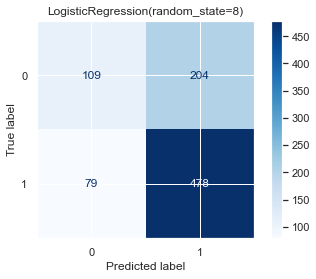

In [38]:
print_metrics(baseline_model, X_train_scaled, y_train, X_test_scaled, y_test)

## 3. Build and Evaluate Additional Logistic Regression Models

Using `GridSearchCV` we are going to see what hyperparameters minimize our log loss. First we are going to try L1 penalties. 

In [39]:
# Definite a log_param_grid
log_L1_param_grid = {'penalty': ['l1'],
                     'solver': ['liblinear', 'saga'],
                     'tol': [0.001, 0.01, 0.1],
                     'max_iter': [1000, 10000],
                     'C': [1, 100, 10000]
                    }

In [40]:
# Instantiate Logistic Regression
log_reg = LogisticRegression(random_state=8)

# Instantiate GridSearchCV
grid_log_l1 = GridSearchCV(log_reg, log_L1_param_grid, scoring='neg_log_loss')

# Fit to the data
grid_log_l1.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=8),
             param_grid={'C': [1, 100, 10000], 'max_iter': [1000, 10000],
                         'penalty': ['l1'], 'solver': ['liblinear', 'saga'],
                         'tol': [0.001, 0.01, 0.1]},
             scoring='neg_log_loss')

In [41]:
# Look at the best parameters from our GridSearchCV
grid_log_l1.best_params_

{'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.1}

In [42]:
# Instantiate a LogisticRegression
log_model_2 = LogisticRegression(penalty='l1', max_iter=1000, C=1, solver='saga', tol=0.1, random_state=8)

log_model_2.fit(X_train_scaled, y_train)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on X_train and y_train
log_model_2_cv = cross_val_score(log_model_2, X_train_scaled, y_train, scoring='neg_log_loss').mean() * -1

log_model_2_cv

0.6211818067026462

Training Precision:  0.7476681394207167
Testing Precision:  0.6807909604519774


Training Recall:  0.8974661166764879
Testing Recall:  0.8653500897666068


Training Accuracy:  0.7360951285001918
Testing Accuracy:  0.6540229885057471


Training F1-Score:  0.8157471880021424
Testing F1-Score:  0.7620553359683795


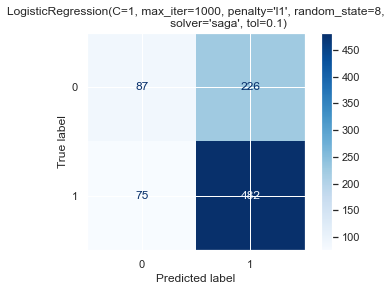

In [43]:
print_metrics(log_model_2, X_train_scaled, y_train, X_test_scaled, y_test)

We can see here that we improved our log loss by going from 0.724 to 0.621. However, it appears that we are overfitting our data since our testing scores are lower than our training scores. Next, we are going to try L2 penalties.

In [44]:
# Definite a log_param_grid
log_L2_param_grid = {'penalty': ['l2'],
                     'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag'],
                     'tol': [0.001, 0.01, 0.1],
                     'max_iter': [1000, 10000],
                     'C': [1, 100, 10000]
                    }

In [45]:
# Instantiate Logistic Regression
log_reg = LogisticRegression(random_state=8)

# Instantiate GridSearchCV
grid_log_l2 = GridSearchCV(log_reg, log_L2_param_grid, scoring='neg_log_loss')

# Fit to the data
grid_log_l2.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=8),
             param_grid={'C': [1, 100, 10000], 'max_iter': [1000, 10000],
                         'penalty': ['l2'],
                         'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs',
                                    'sag'],
                         'tol': [0.001, 0.01, 0.1]},
             scoring='neg_log_loss')

In [46]:
# Look at the best parameters from our GridSearchCV
grid_log_l2.best_params_

{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.1}

In [47]:
# Instantiate a LogisticRegression
log_model_3 = LogisticRegression(penalty='l2', max_iter=1000, C=1, solver='saga', tol=0.1, random_state=8)

# Fit the model
log_model_3.fit(X_train_scaled, y_train)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on X_train and y_train
model_3_cv = cross_val_score(log_model_2, X_train_scaled, y_train, scoring='neg_log_loss')

model_3_cv.mean() * -1

0.6211818067026462

Training Precision:  0.748641975308642
Testing Precision:  0.6827195467422096


Training Recall:  0.8933411903358869
Testing Recall:  0.8653500897666068


Training Accuracy:  0.7353279631760644
Testing Accuracy:  0.6563218390804598


Training F1-Score:  0.8146157979580869
Testing F1-Score:  0.7632620744259699


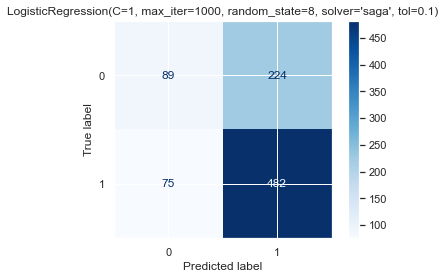

In [48]:
print_metrics(log_model_3, X_train_scaled, y_train, X_test_scaled, y_test)

Once again it looks like we improved our log loss score but we are still overfitting. Let's try to move onto a different model.

## 4. Build a Baseline kNN Model

In [49]:
# Creating the model
knn_baseline_model = KNeighborsClassifier()
knn_baseline_model.fit(X_train_scaled, y_train)

# Perform cross-validation
knn_baseline_log_loss = cross_val_score(knn_baseline_model, X_train_scaled, y_train, scoring='neg_log_loss')

knn_baseline_log_loss * -1

array([1.98584742, 1.79072003, 2.00225653, 2.30446492, 2.38358349])

In [50]:
knn_baseline_log_loss = knn_baseline_log_loss.mean() * -1
knn_baseline_log_loss

2.0933744772102196

Training Precision:  0.75
Testing Precision:  0.6657142857142857


Training Recall:  0.8962875662934591
Testing Recall:  0.8366247755834829


Training Accuracy:  0.7380130418105102
Testing Accuracy:  0.6264367816091954


Training F1-Score:  0.8166442953020133
Testing F1-Score:  0.7414478918058869


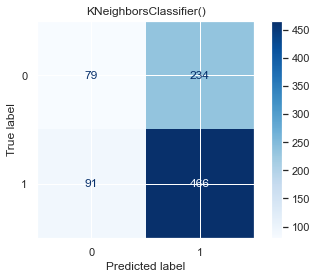

In [51]:
print_metrics(knn_baseline_model, X_train_scaled, y_train, X_test_scaled, y_test)

As we can tell, this baseline kNN model did not do as well as the baseline logistic regression model nor the logistic regression model with hypertuning. Maybe if we apply some tuning to it, we will be able to beat the logistic regression model. We also still appear to be overfitting.

## 5. Build Iterative Models to Find the Best kNN Model

In [52]:
# Definite a kNN_param_grid
kNN_param_grid = {'n_neighbors': [1, 5, 50, 100],
                     'metric': ['minkowski', 'manhattan', 'euclidean'],
                     'weights': ['uniform', 'distance'],
                     'leaf_size': [5, 10, 30],
                    }

In [53]:
# Instantiate Logistic Regression
kNN_reg = KNeighborsClassifier()

# Instantiate GridSearchCV
kNN_grid = GridSearchCV(kNN_reg, kNN_param_grid, scoring='neg_log_loss')

# Fit to the data
kNN_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [5, 10, 30],
                         'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [1, 5, 50, 100],
                         'weights': ['uniform', 'distance']},
             scoring='neg_log_loss')

In [54]:
# Look at the best parameters from our GridSearchCV
kNN_grid.best_params_

{'leaf_size': 5,
 'metric': 'manhattan',
 'n_neighbors': 100,
 'weights': 'distance'}

In [55]:
# Look at the score of this model
kNN_grid.best_score_ * -1

0.6279927510361641

In [56]:
# Instatiate a model with the best parameters
knn_model_2 = KNeighborsClassifier(leaf_size=5, metric='manhattan', n_neighbors=100, weights='distance')

# Fit the model on our data
knn_model_2.fit(X_train_scaled, y_train)

KNeighborsClassifier(leaf_size=5, metric='manhattan', n_neighbors=100,
                     weights='distance')

Training Precision:  1.0
Testing Precision:  0.6467136150234741


Training Recall:  1.0
Testing Recall:  0.9892280071813285


Training Accuracy:  1.0
Testing Accuracy:  0.6471264367816092


Training F1-Score:  1.0
Testing F1-Score:  0.7821149751596876


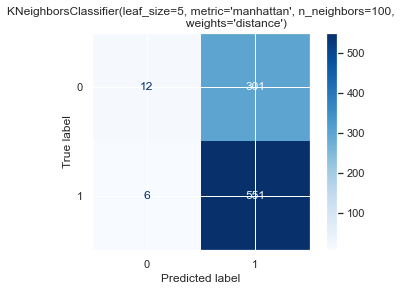

In [57]:
print_metrics(knn_model_2, X_train_scaled, y_train, X_test_scaled, y_test)

We can see that we got a comperable log loss to our logistic regression model, but we did not beat it (0.628 compared to 0.6217). We also got our highest testing F-1 score in 78%. However, we are defintely overfitting and our model is predicted too many drafted players. Maybe we can tune our `GridSearchCV` to fix this issue. 

In [58]:
# Definite a log_param_grid
kNN_param_grid_2 = {'n_neighbors': [1, 3, 7, 13],
                     'metric': ['minkowski', 'manhattan', 'euclidean'],
                     'weights': ['uniform', 'distance'],
                     'leaf_size': [3, 5, 10]
                    }

In [59]:
# Instantiate Logistic Regression
kNN_reg_2 = KNeighborsClassifier()

# Instantiate GridSearchCV
kNN_grid_2 = GridSearchCV(kNN_reg_2, kNN_param_grid_2, scoring='neg_log_loss')

# Fit to the data
kNN_grid_2.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [3, 5, 10],
                         'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [1, 3, 7, 13],
                         'weights': ['uniform', 'distance']},
             scoring='neg_log_loss')

In [60]:
# Look at the best parameters from our GridSearchCV
kNN_grid_2.best_params_

{'leaf_size': 3,
 'metric': 'manhattan',
 'n_neighbors': 13,
 'weights': 'uniform'}

In [61]:
# Look at our log loss score
kNN_grid_2.best_score_ * -1

0.7189459224915471

In [62]:
# Instatiate a model with the best parameters
knn_model_3 = KNeighborsClassifier(leaf_size=3, metric='manhattan', n_neighbors=13, weights='uniform')

# Fit the model on our data
knn_model_3.fit(X_train_scaled, y_train)

KNeighborsClassifier(leaf_size=3, metric='manhattan', n_neighbors=13)

Training Precision:  0.6935483870967742
Testing Precision:  0.6623376623376623


Training Recall:  0.9375368296994696
Testing Recall:  0.9156193895870736


Training Accuracy:  0.6896816263904871
Testing Accuracy:  0.6471264367816092


Training F1-Score:  0.797293911300426
Testing F1-Score:  0.7686510926902788


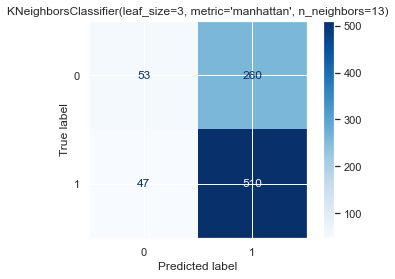

In [63]:
print_metrics(knn_model_3, X_train_scaled, y_train, X_test_scaled, y_test)

This looks a bit better as we are not testing 100% on our training data. However our testing accuracy and testing F-1 scores are in line with the previous model. Let's try one last `GridSearchCV` to see if we can improve upon this.

In [64]:
# Definite a kNN_param_grid
kNN_param_grid_3 = {'n_neighbors': [3, 5, 7, 9],
                     'metric': ['minkowski', 'manhattan', 'euclidean'],
                     'weights': ['uniform', 'distance'],
                     'leaf_size': [1, 2, 3]
                    }

In [65]:
# Instantiate kNN Regression
kNN_reg_4 = KNeighborsClassifier()

# Instantiate GridSearchCV
kNN_grid_4 = GridSearchCV(kNN_reg_4, kNN_param_grid_3, scoring='neg_log_loss')

# Fit to the data
kNN_grid_4.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3],
                         'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='neg_log_loss')

In [66]:
# Look at the best parameters from our GridSearchCV
kNN_grid_4.best_params_

{'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}

In [67]:
kNN_grid_4.best_score_ * -1

0.9430750018123284

In [68]:
# Instatiate a model with the best parameters
knn_model_4 = KNeighborsClassifier(leaf_size=1, metric='minkowski', n_neighbors=9, weights='uniform')

# Fit the model on our data
knn_model_4.fit(X_train_scaled, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=9)

Training Precision:  0.7163350300786673
Testing Precision:  0.6612021857923497


Training Recall:  0.9121979964643488
Testing Recall:  0.8689407540394973


Training Accuracy:  0.7077100115074798
Testing Accuracy:  0.6310344827586207


Training F1-Score:  0.80248833592535
Testing F1-Score:  0.7509697439875872


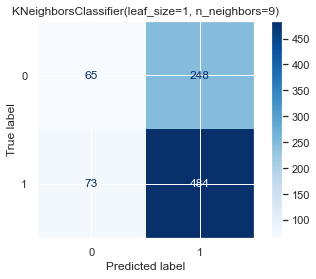

In [69]:
print_metrics(knn_model_4, X_train_scaled, y_train, X_test_scaled, y_test)

This fourth model appears to be worse than the third model: 64% vs 63% testing accuracy and 77% vs 75% testing F-1 score. For now, we will call kNN Model #3 our best model.

## 6. Build a Baseline Decision Tree Model


In [70]:
# Create the model
dtc_baseline_model = DecisionTreeClassifier(random_state=8)
dtc_baseline_model.fit(X_train, y_train)

# Perform cross-validation
dtc_baseline_model_cv = cross_val_score(dtc_baseline_model, X_train, y_train, scoring='neg_log_loss')

dtc_baseline_model_cv

array([-13.03491744, -13.89506935, -13.5902747 , -12.46328507,
       -12.7284442 ])

In [71]:
dtc_baseline_model_cv = dtc_baseline_model_cv.mean() * -1
dtc_baseline_model_cv

13.142398153564802

Training Precision:  1.0
Testing Precision:  0.69009009009009


Training Recall:  1.0
Testing Recall:  0.6876122082585279


Training Accuracy:  1.0
Testing Accuracy:  0.6022988505747127


Training F1-Score:  1.0
Testing F1-Score:  0.6888489208633093


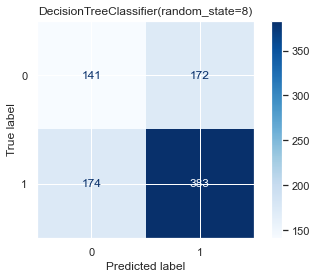

In [72]:
print_metrics(dtc_baseline_model, X_train, y_train, X_test, y_test)

This baseline Decision Tree model did decent. We can probably assume that the model is overfitting since we have not 'pruned' it at all. Let's see if we can improve it.

## 7. Build Iterative Models to Find the Best Decision Tree Model

In [73]:
# Definite a dtc_param_grid
dtc_param_grid = {'criterion': ['gini', 'entropy'],
                     'max_depth': [1, 5, 10],
                     'min_samples_split': [2, 5, 10],
                     'min_samples_leaf': [1, 5, 10],
                     'max_features': [1, 3, 5]
                    }

In [74]:
# Instantiate Decision Tree
dtc_1 = DecisionTreeClassifier(random_state=8)

# Instantiate GridSearchCV
dtc_grid_1 = GridSearchCV(dtc_1, dtc_param_grid, scoring='neg_log_loss')

# Fit to the data
dtc_grid_1.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10], 'max_features': [1, 3, 5],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_log_loss')

In [75]:
# Look at the best parameters from our GridSearchCV
dtc_grid_1.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [76]:
# Instantiate a DecisionTreeClassifier With The Results From Above
dtc_model_1 = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features=5, 
                                 min_samples_leaf=10, min_samples_split=2, random_state=8)

dtc_model_1.fit(X_train, y_train)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on X_train and y_train
dtc_model_1_cv = cross_val_score(dtc_model_1, X_train, y_train, scoring='neg_log_loss')

dtc_model_1_cv.mean() * -1

0.6439786997190948

Training Precision:  0.6537267080745341
Testing Precision:  0.6411149825783972


Training Recall:  0.9923394225103123
Testing Recall:  0.9910233393177738


Training Accuracy:  0.6528576908323743
Testing Accuracy:  0.639080459770115


Training F1-Score:  0.7882050081909666
Testing F1-Score:  0.778561354019746


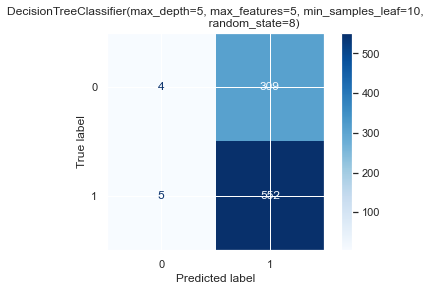

In [77]:
print_metrics(dtc_model_1, X_train, y_train, X_test, y_test)

Our training data and testing data are in line with one another but we still are not testing at a great rate. Let's try some different parameters in our DTC grid.

In [78]:
# Definite a dtc_param_grid
dtc_param_grid_2 = {'criterion': ['gini', 'entropy'],
                     'max_depth': [5, 10, 15, 20],
                     'min_samples_split': [5, 10, 15],
                     'min_samples_leaf': [5, 10, 15],
                     'max_features': [5, 7, 9, 10, 11]
                    }

In [79]:
# Instantiate Decision Tree
dtc_model_2 = DecisionTreeClassifier(random_state=8)

# Instantiate GridSearchCV
dtc_grid_2 = GridSearchCV(dtc_model_2, dtc_param_grid_2, scoring='neg_log_loss')

# Fit to the data
dtc_grid_2.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': [5, 7, 9, 10, 11],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15]},
             scoring='neg_log_loss')

In [80]:
# Look at the best parameters from our GridSearchCV
dtc_grid_2.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 5}

In [81]:
# Instantiate a DecisionTreeClassifier With The Results From Above
dtc_model_2 = DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=10, 
                                 min_samples_leaf=10, min_samples_split=5, random_state=8)

dtc_model_2.fit(X_train, y_train)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on X_train and y_train
dtc_model_2_cv = cross_val_score(dtc_model_2, X_train, y_train, scoring='neg_log_loss')

dtc_model_2_cv.mean() * -1

0.6336447159136448

Training Precision:  0.6968345965225144
Testing Precision:  0.6587301587301587


Training Recall:  0.9210371243370654
Testing Recall:  0.8940754039497307


Training Accuracy:  0.6877637130801688
Testing Accuracy:  0.635632183908046


Training F1-Score:  0.7934010152284263
Testing F1-Score:  0.7585681645087585


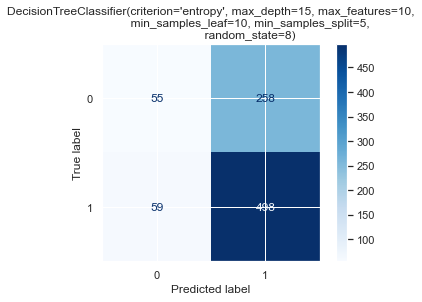

In [82]:
print_metrics(dtc_model_2, X_train, y_train, X_test, y_test)

Great! Let's try one final `GridSearchCV`.

In [83]:
# Definite a dtc_param_grid
dtc_param_grid_3 = {'criterion': ['gini', 'entropy'],
                     'max_depth': [9, 12, 15, 18],
                     'min_samples_split': [2, 5, 8, 10],
                     'min_samples_leaf': [8, 9, 10, 11, 12],
                     'max_features': [7, 8, 9, 10, 11]
                    }

In [84]:
# Instantiate Decision Tree
dtc_model_3 = DecisionTreeClassifier(random_state=8)

# Instantiate GridSearchCV
dtc_grid_3 = GridSearchCV(dtc_model_3, dtc_param_grid_3, scoring='neg_log_loss')

# Fit to the data
dtc_grid_3.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [9, 12, 15, 18],
                         'max_features': [7, 8, 9, 10, 11],
                         'min_samples_leaf': [8, 9, 10, 11, 12],
                         'min_samples_split': [2, 5, 8, 10]},
             scoring='neg_log_loss')

In [85]:
# Look at the best parameters from our GridSearchCV
dtc_grid_3.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 10,
 'min_samples_leaf': 11,
 'min_samples_split': 2}

In [86]:
# Instantiate a DecisionTreeClassifier With The Results From Above
dtc_model_3 = DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features=10, 
                                 min_samples_leaf=11, min_samples_split=2, random_state=8)

dtc_model_3.fit(X_train, y_train)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on X_train and y_train
dtc_model_3_cv = cross_val_score(dtc_model_3, X_train, y_train, scoring='neg_log_loss')

dtc_model_3_cv.mean() * -1

0.6321449585071602

Training Precision:  0.6950291088222122
Testing Precision:  0.671562082777036


Training Recall:  0.9145550972304066
Testing Recall:  0.9030520646319569


Training Accuracy:  0.6831607211354047
Testing Accuracy:  0.6551724137931034


Training F1-Score:  0.7898218829516539
Testing F1-Score:  0.7702909647779478


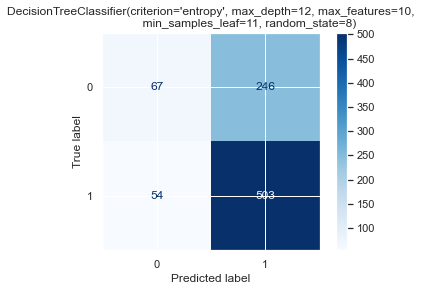

In [87]:
print_metrics(dtc_model_3, X_train, y_train, X_test, y_test)

Well this is good, it appears to be our best model yet. Let's move onto a new model.

## 8. Build a Baseline Random Forest Model


In [88]:
# Create the model
rf_baseline_model = RandomForestClassifier(random_state=8)
rf_baseline_model.fit(X_train, y_train)

# Perform cross-validation
rf_baseline_model_cv = cross_val_score(rf_baseline_model, X_train, y_train, scoring='neg_log_loss')

rf_baseline_model_cv * -1

array([0.58533363, 0.59921058, 0.61239913, 0.61261668, 0.58747813])

In [89]:
rf_baseline_model_cv = rf_baseline_model_cv.mean() * -1
rf_baseline_model_cv

0.5994076290210104

Training Precision:  1.0
Testing Precision:  0.6909340659340659


Training Recall:  1.0
Testing Recall:  0.9030520646319569


Training Accuracy:  1.0
Testing Accuracy:  0.6793103448275862


Training F1-Score:  1.0
Testing F1-Score:  0.7828793774319066


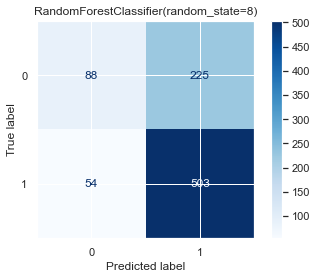

In [90]:
print_metrics(rf_baseline_model, X_train, y_train, X_test, y_test)

Wow! The Random Forest baseline model did well on the testing accuracy and testing F-1 scores. But we are defintely overfitting. Let's try pruning our tree to get a better model.

## 9. Build Iterative Models to Find the Best Random Forest Model

In [91]:
# Definite a rf_param_grid
rf_param_grid_1 = {'criterion': ['gini', 'entropy'],
                   'n_estimators': [50, 100, 150],
                     'max_depth': [1, 5, 10],
                     'min_samples_split': [2, 5, 20],
                     'min_samples_leaf': [1, 5, 10],
                     'max_features': [1, 5, 10]
                    }

In [92]:
# Instantiate Decision Tree
rf_model_1 = RandomForestClassifier(random_state=8)

# Instantiate GridSearchCV
rf_grid_1 = GridSearchCV(rf_model_1, rf_param_grid_1, scoring='neg_log_loss')

# Fit to the data
rf_grid_1.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10], 'max_features': [1, 5, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 20],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_log_loss')

In [93]:
# Look at the best parameters from our GridSearchCV
rf_grid_1.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [94]:
# Instantiate a RandomForestClassifier With The Results From Above
rf_model_1 = RandomForestClassifier(criterion='gini', max_depth=10, max_features=10, 
                                 min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=8)

rf_model_1.fit(X_train, y_train)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on X_train and y_train
rf_model_1_cv = cross_val_score(rf_model_1, X_train, y_train, scoring='neg_log_loss')

rf_model_1_cv.mean() * -1

0.6134990602217981

Training Precision:  0.6721115537848605
Testing Precision:  0.648235294117647


Training Recall:  0.9941072480848556
Testing Recall:  0.9892280071813285


Training Accuracy:  0.6804756425009589
Testing Accuracy:  0.6494252873563219


Training F1-Score:  0.8019966722129783
Testing F1-Score:  0.783226723525231


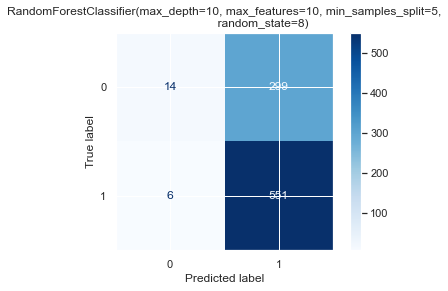

In [95]:
print_metrics(rf_model_1, X_train, y_train, X_test, y_test)

Let's try one final grid search to see if we can beat Decision Tree Model #3.

In [96]:
# Definite a rf_param_grid
rf_param_grid_2 = {'criterion': ['gini', 'entropy'],
                   'n_estimators': [10, 25, 50],
                     'max_depth': [5, 10, 15],
                     'min_samples_split': [2, 5, 9],
                     'min_samples_leaf': [1, 3, 5],
                     'max_features': [3, 7, 9]
                    }

In [97]:
# Instantiate Decision Tree
rf_model_2 = RandomForestClassifier(random_state=8)

# Instantiate GridSearchCV
rf_grid_2 = GridSearchCV(rf_model_2, rf_param_grid_2, scoring='neg_log_loss')

# Fit to the data
rf_grid_2.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15], 'max_features': [3, 7, 9],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 9],
                         'n_estimators': [10, 25, 50]},
             scoring='neg_log_loss')

In [98]:
# Look at the best parameters from our GridSearchCV
rf_grid_2.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [99]:
# Instantiate a RandomForestClassifier With The Results From Above
rf_model_2 = RandomForestClassifier(criterion='gini', max_depth=15, max_features=9, 
                                 min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=8)

rf_model_2.fit(X_train, y_train)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model on X_train and y_train
rf_model_2_cv = cross_val_score(rf_model_2, X_train, y_train, scoring='neg_log_loss')

rf_model_2_cv.mean() * -1

0.6073017023071366

Training Precision:  0.7185908319185059
Testing Precision:  0.6570048309178744


Training Recall:  0.9976428992339422
Testing Recall:  0.9766606822262118


Training Accuracy:  0.744150364403529
Testing Accuracy:  0.6586206896551724


Training F1-Score:  0.8354305452751047
Testing F1-Score:  0.7855595667870036


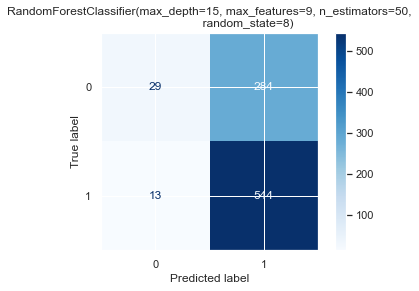

In [100]:
print_metrics(rf_model_2, X_train, y_train, X_test, y_test)